# Plotting from `NWB` files
In this tutorial you'll learn to use the `plot_from_nwb()` function to plot the 3D mesh of brain structures and electrode positions contained in a [Neurodata Without Borders: Neurophysiology 2.0](https://www.nwb.org/) format.

Let's start importing the relevant modules:

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
from img_pipe import plotting
%matplotlib inline

Now indicate the location of your `nwb` file. The standard way is to place it inside the Freesurfers subjects path, defined by the environment variable `SUBJECTS_DIR`. You can also select which hemisphere to plot (the default is both, 'stereo').

First let us take a look at the subjects's brain structure: 

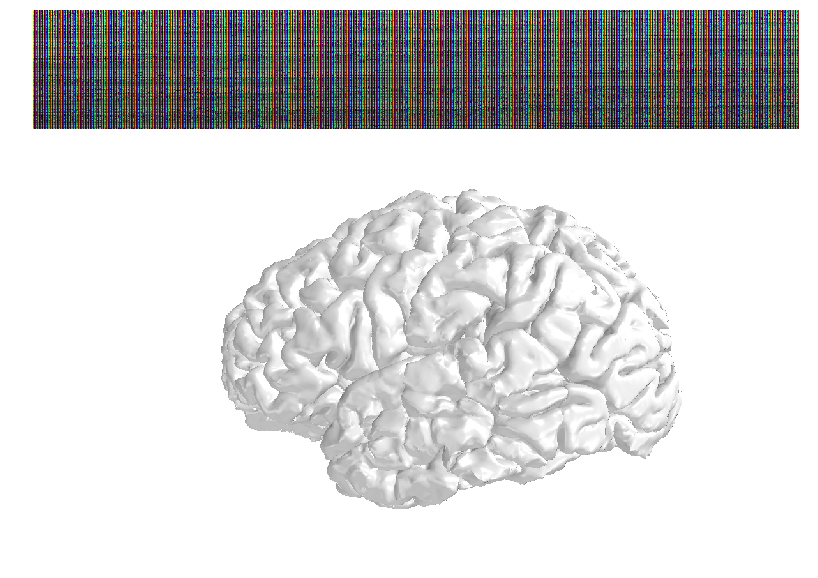

In [12]:
subj_file = 'ben_subjects/EC125_B22.nwb'

# Call function and generate mlab image
# If interactive==True, a new interactive window opens (uncomment to try)
#mesh, mlab = plotting.plot_from_nwb(subj_file, opacity=.7, interactive=True)

# If it's not interactive (by default), we set up the static visualization angle
mesh, mlab = plotting.plot_from_nwb(subj_file)

mlab.view(azimuth=180, elevation=90, distance=300)
arr = mlab.screenshot(antialiased=True)
plt.figure(figsize=(15,10))
plt.imshow(arr, aspect='equal')
plt.axis('off')
plt.show()
mlab.close()

We can emphasize any **Region of Interest** defined in the `NWB` file: 

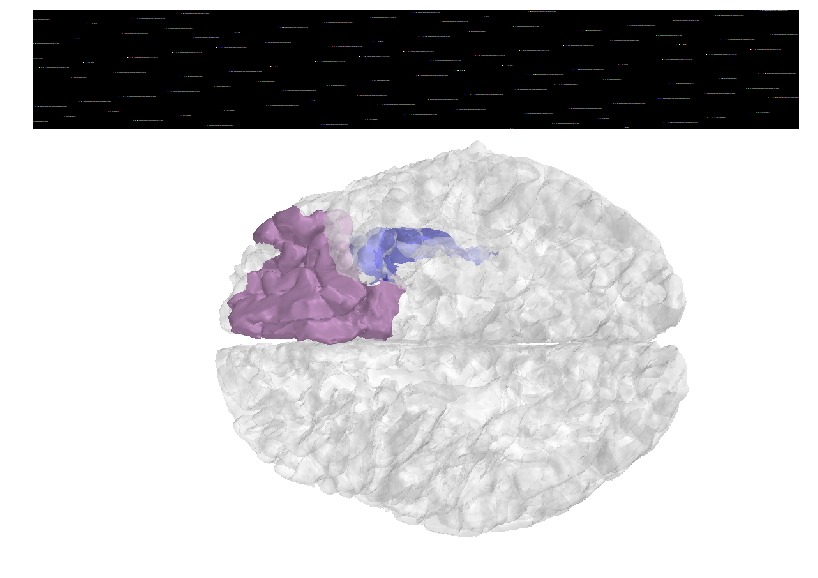

In [16]:
lh_lOFC = {"name":'lh_lOFC', "opacity":1., "color":(.5,.3,.5)}
lh_LHinsula = {"name":'lh_LHinsula', "opacity":1., "color":(.1,.1,.7)}
roi = [lh_lOFC, lh_LHinsula]

mesh, mlab = plotting.plot_from_nwb(subj_file, opacity=.3, roi=roi)

mlab.view(azimuth=270, elevation=180, distance=300)
arr = mlab.screenshot(antialiased=True)
plt.figure(figsize=(20,10))
plt.imshow(arr, aspect='equal')
plt.axis('off')
plt.show()
mlab.close()

Next, let's plot the **electrodes** in their original coordinates.

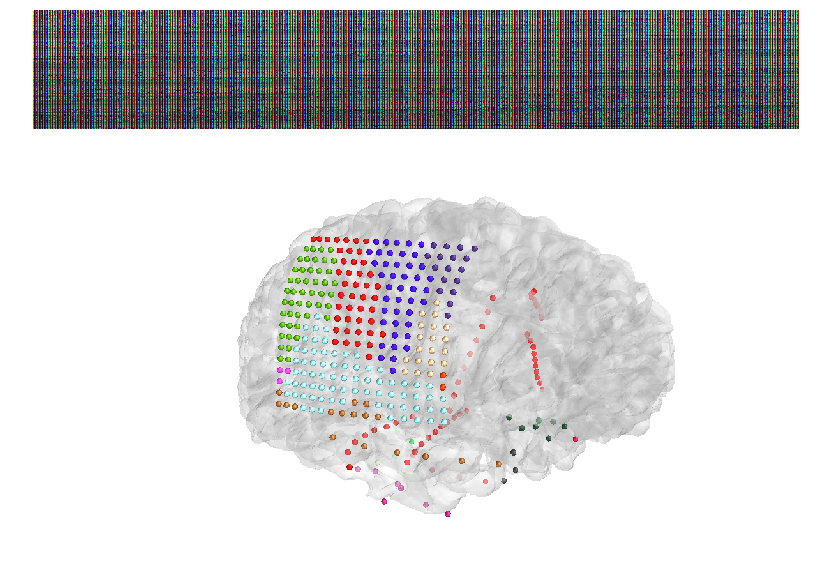

In [15]:
mesh, mlab = plotting.plot_from_nwb(subj_file, hem='stereo', opacity=0.3, electrodes=True)

mlab.view(azimuth=30, elevation=90, distance=300)
arr = mlab.screenshot(antialiased=True)
plt.figure(figsize=(20,10))
plt.imshow(arr, aspect='equal')
plt.axis('off')
plt.show()
mlab.close()

We can select a specific group of **electrodes by location**, and plot only the relevant hemisphere:

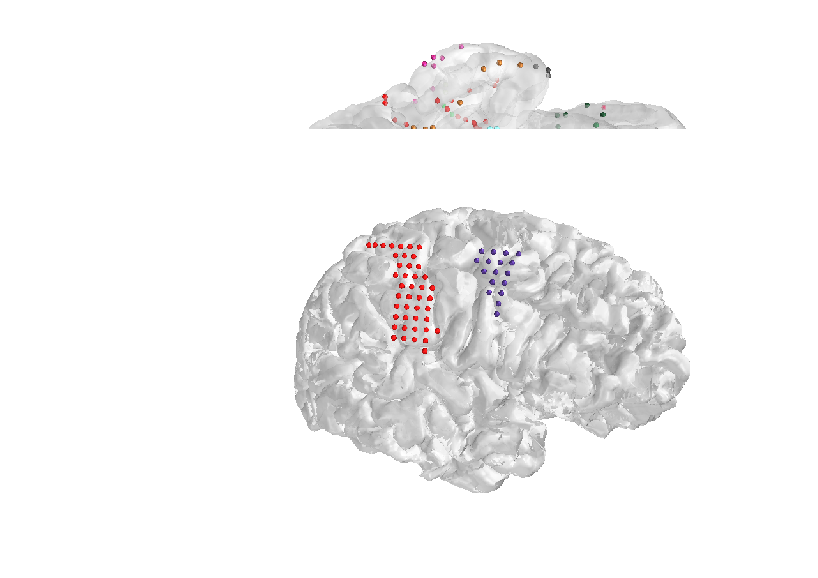

In [35]:
elec_roi_list = ['rostralmiddlefrontal', 'postcentral']

mesh, mlab = plotting.plot_from_nwb(subj_file, hem='rh', opacity=0.8, electrodes=True, elec_roi=elec_roi_list)

mlab.view(azimuth=30, elevation=90, distance=300)
arr = mlab.screenshot(antialiased=True)
plt.figure(figsize=(20,10))
plt.imshow(arr, aspect='equal')
plt.axis('off')
plt.show()
mlab.close()

Finally, we can visualize the electrodes at their **warped coordinates**:

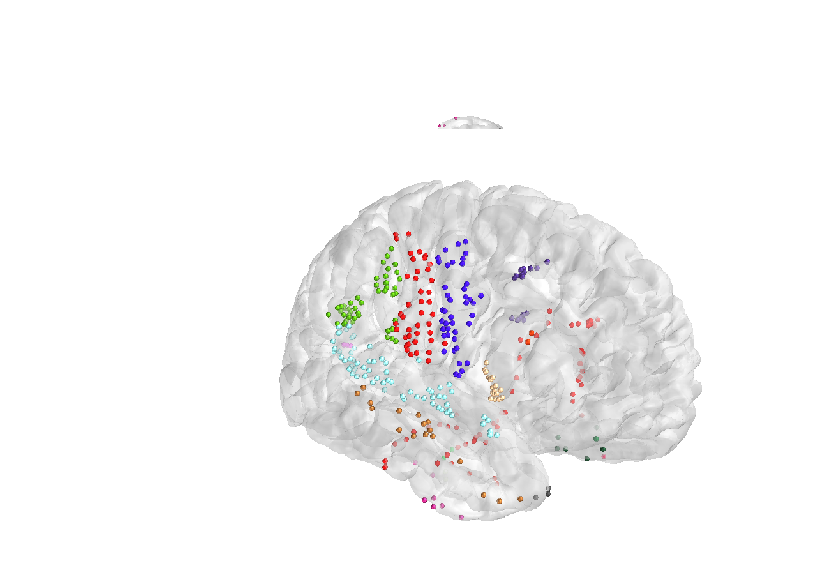

In [34]:
mesh, mlab = plotting.plot_from_nwb(subj_file, hem='rh', opacity=0.4, electrodes=True, elec_space='warped')

mlab.view(azimuth=30, elevation=90, distance=300)
arr = mlab.screenshot(antialiased=False)
plt.figure(figsize=(20,10))
plt.imshow(arr, aspect='equal')
plt.axis('off')
plt.show()
mlab.close()

**Useful references:** <br>
[Neurodata Without Borders: Neurophysiology 2.0](https://www.nwb.org/)
[NWB for Python](https://pynwb.readthedocs.io/en/stable/index.html) <br>
[nwbext_ecog: An NWB extension for ECoG data](https://github.com/bendichter/nwbext_ecog) <br>
[img_pipe: Image processing pipeline for ECoG data](https://github.com/ChangLabUcsf/img_pipe)
